In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

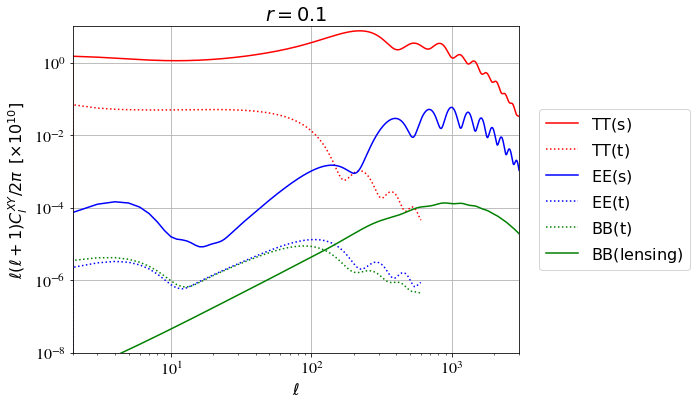

In [3]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
                   'output':'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246}
                   # other output and precision parameters
                   #'l_max_scalars':3000}
###############
#    
# call CLASS 
#
###############
#
# scalars only
#
M = Class()
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.9619,'l_max_scalars':3000})
M.compute()
cls = M.raw_cl(3000)
M.struct_cleanup()
M.empty()
#
# tensors only
#
M = Class()
M.set(common_settings)
l_max_tensors = 600
M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,'l_max_tensors':l_max_tensors})
# for l_max=600 we can keep default precision
# for l_max = 3000 we would need to import many high precision settings from the file cl_ref.pre
#M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,'l_max_tensors':3000})
#M.set({
#'recfast_Nz0':100000,
#'tol_thermo_integration':1.e-5,
#'recfast_x_He0_trigger_delta':0.01,
#'recfast_x_H0_trigger_delta':0.01,
#'evolver':0,
#'k_min_tau0':0.002,
#'k_max_tau0_over_l_max':3.,
#'k_step_sub':0.015,
#'k_step_super':0.0001,
#'k_step_super_reduction':0.1,
#'start_small_k_at_tau_c_over_tau_h':0.0004,
#'start_large_k_at_tau_h_over_tau_k':0.05,
#'tight_coupling_trigger_tau_c_over_tau_h':0.005,
#'tight_coupling_trigger_tau_c_over_tau_k':0.008,
#'start_sources_at_tau_c_over_tau_h':0.006,
#'l_max_g':50,
#'l_max_pol_g':25,
#'l_max_ur':50,
#'tol_perturb_integration':1.e-6,
#'perturb_sampling_stepsize':0.01,
#'radiation_streaming_approximation':2,
#'radiation_streaming_trigger_tau_over_tau_k':240.,
#'radiation_streaming_trigger_tau_c_over_tau':100.,
#'ur_fluid_approximation':2,
#'ur_fluid_trigger_tau_over_tau_k':50.,
#'l_logstep':1.026,
#'l_linstep':25,
#'hyper_sampling_flat':12.,
#'hyper_nu_sampling_step':10.,
#'hyper_phi_min_abs':1.e-10,
#'hyper_x_tol':1.e-4,
#'hyper_flat_approximation_nu':1.e6,
#'q_linstep':0.20,
#'q_logstep_spline':20.,
#'q_logstep_trapzd':0.5,
#'q_numstep_transition':250,
#'transfer_neglect_delta_k_T_t2':100.,
#'transfer_neglect_delta_k_T_e':100.,
#'transfer_neglect_delta_k_T_b':100.,
#'neglect_CMB_sources_below_visibility':1.e-30,
#'transfer_neglect_late_source':3000.
#})
M.compute()
clt = M.raw_cl(l_max_tensors)
M.struct_cleanup()
M.empty()
#
# scalars + tensors (only in this case we can get the correct lensed ClBB)
#
M = Class()
M.set(common_settings)
M.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','r':0.1,'n_s':0.9619,'n_t':0,'l_max_scalars':3000,'l_max_tensors':l_max_tensors})
M.compute()
cl_tot = M.raw_cl(3000)
cl_lensed = M.lensed_cl(3000)
M.struct_cleanup()
M.empty()
#
#################
#
# start plotting
#
#################
#
plt.xlim([2,3000])
plt.ylim([1.e-8,10])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"$r=0.1$")
plt.grid()
#
ell = cl_tot['ell']
ellt = clt['ell']
factor = 1.e10*ell*(ell+1.)/2./math.pi
factort = 1.e10*ellt*(ellt+1.)/2./math.pi
#
plt.loglog(ell,factor*cls['tt'],'r-',label=r'$\mathrm{TT(s)}$')
plt.loglog(ellt,factort*clt['tt'],'r:',label=r'$\mathrm{TT(t)}$')
plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')
plt.loglog(ellt,factort*clt['ee'],'b:',label=r'$\mathrm{EE(t)}$')
plt.loglog(ellt,factort*clt['bb'],'g:',label=r'$\mathrm{BB(t)}$')
plt.loglog(ell,factor*(cl_lensed['bb']-cl_tot['bb']),'g-',label=r'$\mathrm{BB(lensing)}$')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

In [ ]:
plt.savefig('cl_ST.pdf',bbox_inches='tight')